<a href="https://colab.research.google.com/github/iamrajharshit/OnPSO/blob/main/pyswarmPSO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=7f2544deb9789c14ee1fceb76bd1853fd674c30f0f4dd005ccfc3f99b0f538ff
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [5]:
! pip install matplotlib

In [2]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from pyswarm import pso

In [3]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()

In [4]:
X=data.data
y=data.target

In [5]:
X=pd.DataFrame(X,columns=data.feature_names)
y=pd.Series(y)

In [6]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [7]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [8]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Initialize a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")

Data preprocessing completed.


In [10]:
X.shape

(569, 30)

In [11]:
y.shape

(569,)

In [12]:
import numpy as np


In [13]:
import numpy as np
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf
from pyswarm import pso
from sklearn.preprocessing import StandardScaler

# Initialize a StandardScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")

def fitness_function(hyperparameters):
    # Unpack hyperparameters
    learning_rate, num_hidden_layers, num_neurons, dropout_rate = hyperparameters

    # Ensure num_neurons and num_hidden_layers are integers
    num_neurons = int(round(num_neurons))
    num_hidden_layers = int(round(num_hidden_layers))

    # Build the neural network model
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))  # Use the actual number of features
    model.add(Dense(num_neurons, activation='relu'))
    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, verbose=0)

    # Get the validation loss from the last epoch
    val_loss = history.history['val_loss'][-1]

    return val_loss


# Example hyperparameters for PSO to optimize
initial_hyperparameters = [0.001, 2, 64, 0.5]  # [learning_rate, num_hidden_layers, num_neurons, dropout_rate]

# Define the lower and upper bounds for each hyperparameter
lb = [1e-5, 1, 32, 0]    # Lower bounds
ub = [1e-1, 5, 128, 0.5]  # Upper bounds

# Run PSO with the defined bounds, reduced swarm size, and maximum iterations
optimal_hyperparameters, val_loss = pso(fitness_function, lb, ub, swarmsize=10, maxiter=20)

print("Optimal hyperparameters found:", optimal_hyperparameters)
print("Validation loss with optimal hyperparameters:", val_loss)

Data preprocessing completed.
Stopping search: maximum iterations reached --> 20
Optimal hyperparameters found: [1.55179477e-03 2.49535060e+00 4.94486328e+01 7.54529606e-02]
Validation loss with optimal hyperparameters: 0.05204332247376442


In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models import Sequential
import tensorflow as tf
from pyswarm import pso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Assuming X_train, X_test, y_train, y_test are your data (ensure correct split beforehand)
# Initialize a StandardScaler instance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data preprocessing completed.")

def fitness_function_with_metrics(hyperparameters, return_full_metrics=False):
    # Unpack hyperparameters
    learning_rate, num_hidden_layers, num_neurons, dropout_rate = hyperparameters

    # Ensure num_neurons and num_hidden_layers are integers
    num_neurons = int(round(num_neurons))
    num_hidden_layers = int(round(num_hidden_layers))

    # Build the neural network model
    model = Sequential()
    model.add(Input(shape=(X_train_scaled.shape[1],)))  # Use the actual number of features
    model.add(Dense(num_neurons, activation='relu'))

    for _ in range(num_hidden_layers - 1):
        model.add(Dense(num_neurons, activation='relu'))
        model.add(Dropout(dropout_rate))

    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    # Compile the model
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # Train the model
    history = model.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, verbose=0)

    # Save the model's architecture and weights
    model.get_config()
    model.get_weights()
    model.save("model.keras")
    from tensorflow.keras.models import load_model
    model = load_model('model.keras')  # Loads the entire model
    # model.save_weights('model_weights.keras')  # Saves only the weights
    # model.load_weights('model_weights.keras')  # Loads the weights back into the model

    from google.colab import drive
    drive.mount('/content/drive')


# Save the model to Google Drive
    model.save('/content/drive/My Drive/model.keras')
    # model.save_weights('/content/drive/My Drive/model_weights.keras')


    # print("Model and weights saved.")


    # Get the validation loss from the last epoch
    val_loss = history.history['val_loss'][-1]

    # Predict on the test set
    y_pred_probs = model.predict(X_test_scaled)
    y_pred = (y_pred_probs > 0.5).astype(int)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_probs)

    # Define a fitness function based on a weighted combination of metrics
    fitness = val_loss + (1 - accuracy) + (1 - precision) + (1 - recall) + (1 - f1)

    if return_full_metrics:
        # Return all metrics for analysis
        return val_loss, accuracy, precision, recall, f1, auc
    else:
        # Return only the fitness value for PSO optimization
        return fitness

# Example hyperparameters for PSO to optimize
initial_hyperparameters = [0.001, 2, 64, 0.5]  # [learning_rate, num_hidden_layers, num_neurons, dropout_rate]

# Define the lower and upper bounds for each hyperparameter
lb = [1e-5, 1, 32, 0]    # Lower bounds
ub = [1e-1, 5, 128, 0.5]  # Upper bounds

# Run PSO with the defined bounds, reduced swarm size, and maximum iterations
optimal_hyperparameters, optimal_fitness = pso(fitness_function_with_metrics, lb, ub, swarmsize=10, maxiter=20)

# After PSO, calculate the final metrics based on the optimal hyperparameters
val_loss, accuracy, precision, recall, f1, auc = fitness_function_with_metrics(optimal_hyperparameters, return_full_metrics=True)

# Display the results
print("Optimal hyperparameters found:", optimal_hyperparameters)
print("Validation loss:", val_loss)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("AUC:", auc)


Data preprocessing completed.
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True)

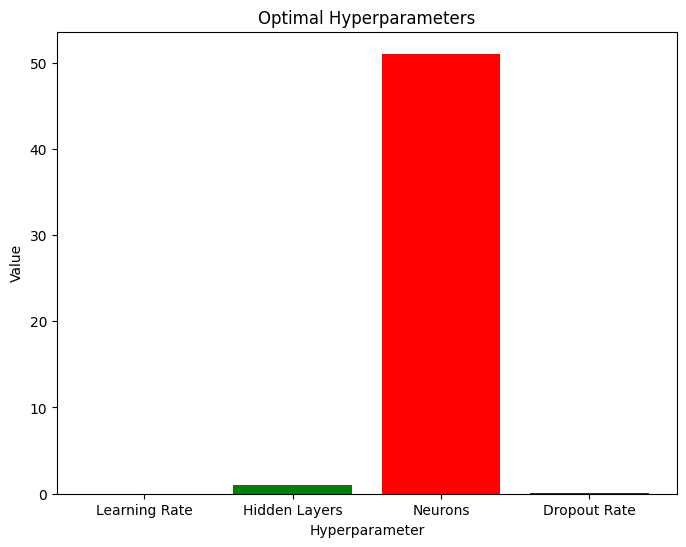

In [16]:
# prompt: graphically rep optimal hyperparameters

import matplotlib.pyplot as plt

# Assuming optimal_hyperparameters is the result from PSO
learning_rate, num_hidden_layers, num_neurons, dropout_rate = optimal_hyperparameters

# Create a bar chart
labels = ['Learning Rate', 'Hidden Layers', 'Neurons', 'Dropout Rate']
values = [learning_rate, num_hidden_layers, num_neurons, dropout_rate]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'green', 'red', 'purple'])
plt.title('Optimal Hyperparameters')
plt.xlabel('Hyperparameter')
plt.ylabel('Value')
plt.show()


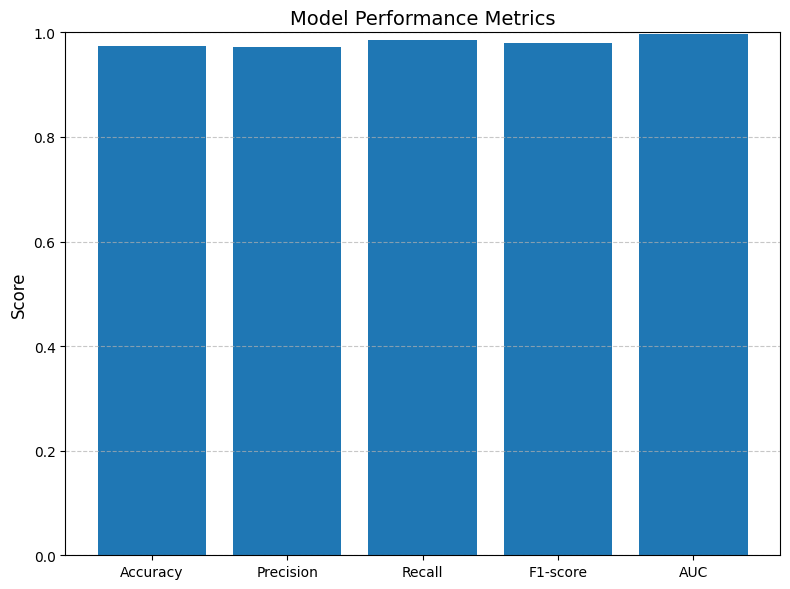

In [18]:
import matplotlib.pyplot as plt

# Assuming you have the following variables:
# accuracy, precision, recall, f1, auc

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the model metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC']
scores = [accuracy, precision, recall, f1, auc]
# colors = ['#4CAF50', '#FF5722', '#2196F3', '#FFC107', '#9C27B0']

# Bar plot for model performance metrics
ax.bar(metrics, scores)
ax.set_title('Model Performance Metrics', fontsize=14)
ax.set_ylabel('Score', fontsize=12)
ax.set_ylim(0, 1)
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

